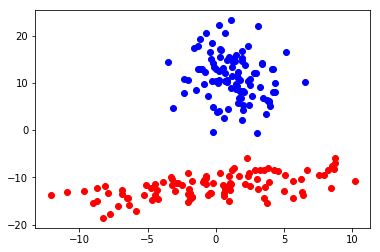

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

with open('archivos_practico2_2017/dataset1Pr2.csv', 'r') as f:
        data = [row for row in csv.reader(f.read().splitlines(),delimiter=',',quoting=csv.QUOTE_NONNUMERIC)]
X = []
Y = []
for lis in data:
   
    X.append([lis[0],lis[1]])
    if lis[2] == 0:
        Y.append(-1)
    else:
        Y.append(1)
    
for x in data:
    r = x[2]
    if r == 1:
        plt.plot(x[0],x[1],'ob')  
    else:
        plt.plot(x[0],x[1],'or')
plt.show()  

In [2]:

mean_vectors = []
mean_vectors.append(np.mean(X[:100], axis=0))
print('Mean Vector class %s: %s\n' %(0, mean_vectors[0]))
mean_vectors.append(np.mean(X[100:200], axis=0))
print('Mean Vector class %s: %s\n' %(1, mean_vectors[1]))
mean_vectors= np.array(mean_vectors)

Mean Vector class 0: [ -0.2861067 -11.7981939]

Mean Vector class 1: [  1.2259011  11.1264771]



In [4]:
S_B = np.outer((mean_vectors[1]-mean_vectors[0]),(mean_vectors[1]-mean_vectors[0]))
print 'between-class Scatter Matrix:\n', S_B
S_W = np.zeros((2,2))
class_sc_mat = np.zeros((2,2))                  # scatter matrix for every class
dats = X[:100]
for row in dats:
    class_sc_mat += np.outer(row-mean_vectors[0],(row-mean_vectors[0]))
S_W += class_sc_mat # sum class scatter matrices
dats = X[100:200]
for row in dats:
    class_sc_mat += np.outer(row-mean_vectors[1],(row-mean_vectors[1]))
S_W += class_sc_mat # sum class scatter matrices
print 'within-class Scatter Matrix:\n', S_W


between-class Scatter Matrix:
[[   2.28616759   34.66228136]
 [  34.66228136  525.54054046]]
within-class Scatter Matrix:
[[ 5499.55493277  1334.79101276]
 [ 1334.79101276  3646.42006707]]


In [6]:

w = np.linalg.inv(S_W).dot((mean_vectors[1]-mean_vectors[0]))
print 'optimal vector:',w

optimal vector: [-0.00137293  0.00678947]


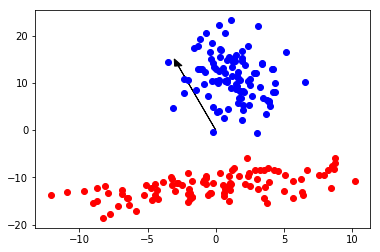

In [19]:
for x in data:
    r = x[2]
    if r == 1:
        plt.plot(x[0],x[1],'ob')  
    else:
        plt.plot(x[0],x[1],'or')
ax = plt.axes()        
ax.arrow(0, 0, w[0]*2000,w[1]*2000,head_width=0.55, head_length=1.5, fc='k', ec='k')        
plt.savefig('LDA_ar.jpg')
plt.show()  

In [12]:
def predict(w,x):
        """ LDA DISCRIMINANT OUTPUT """
        y = x[0]*w[0]+x[1]*w[1] # dot product between w and x
        if y >= 0:
            return 1
        else:
            return -1

In [14]:
r_lab = []
for x in data:
    r_lab.append(predict(w,x))

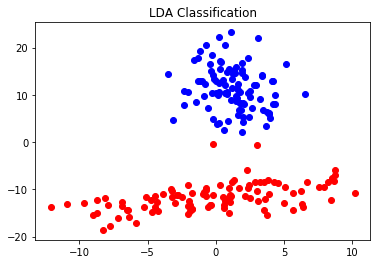

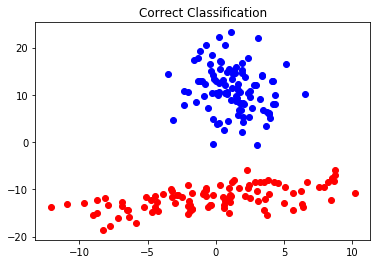

In [20]:
plt.title('LDA Classification')
for x,rl in zip(data,r_lab):
    r = rl
    if r == 1:
        plt.plot(x[0],x[1],'ob')  
    else:
        plt.plot(x[0],x[1],'or') 
plt.savefig('LDA_clas.jpg')        
plt.show() 

plt.title('Correct Classification')
for x in data:
    r = x[2]
    if r == 1:
        plt.plot(x[0],x[1],'ob')  
    else:
        plt.plot(x[0],x[1],'or')   
plt.show() 

In [18]:
print 'Accuracy : {0}'.format((np.array(r_lab) == Y).sum().astype(float) / len(r_lab))

Accuracy : 0.99
